# Import Libraries

In [2]:
import pandas as pd
import numpy as np

# Load data

In [3]:
data = pd.read_csv('diabetes.csv')

# Analyse the data

In [4]:
data.head(-1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# CHECKING FOR MISSION VALUES
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

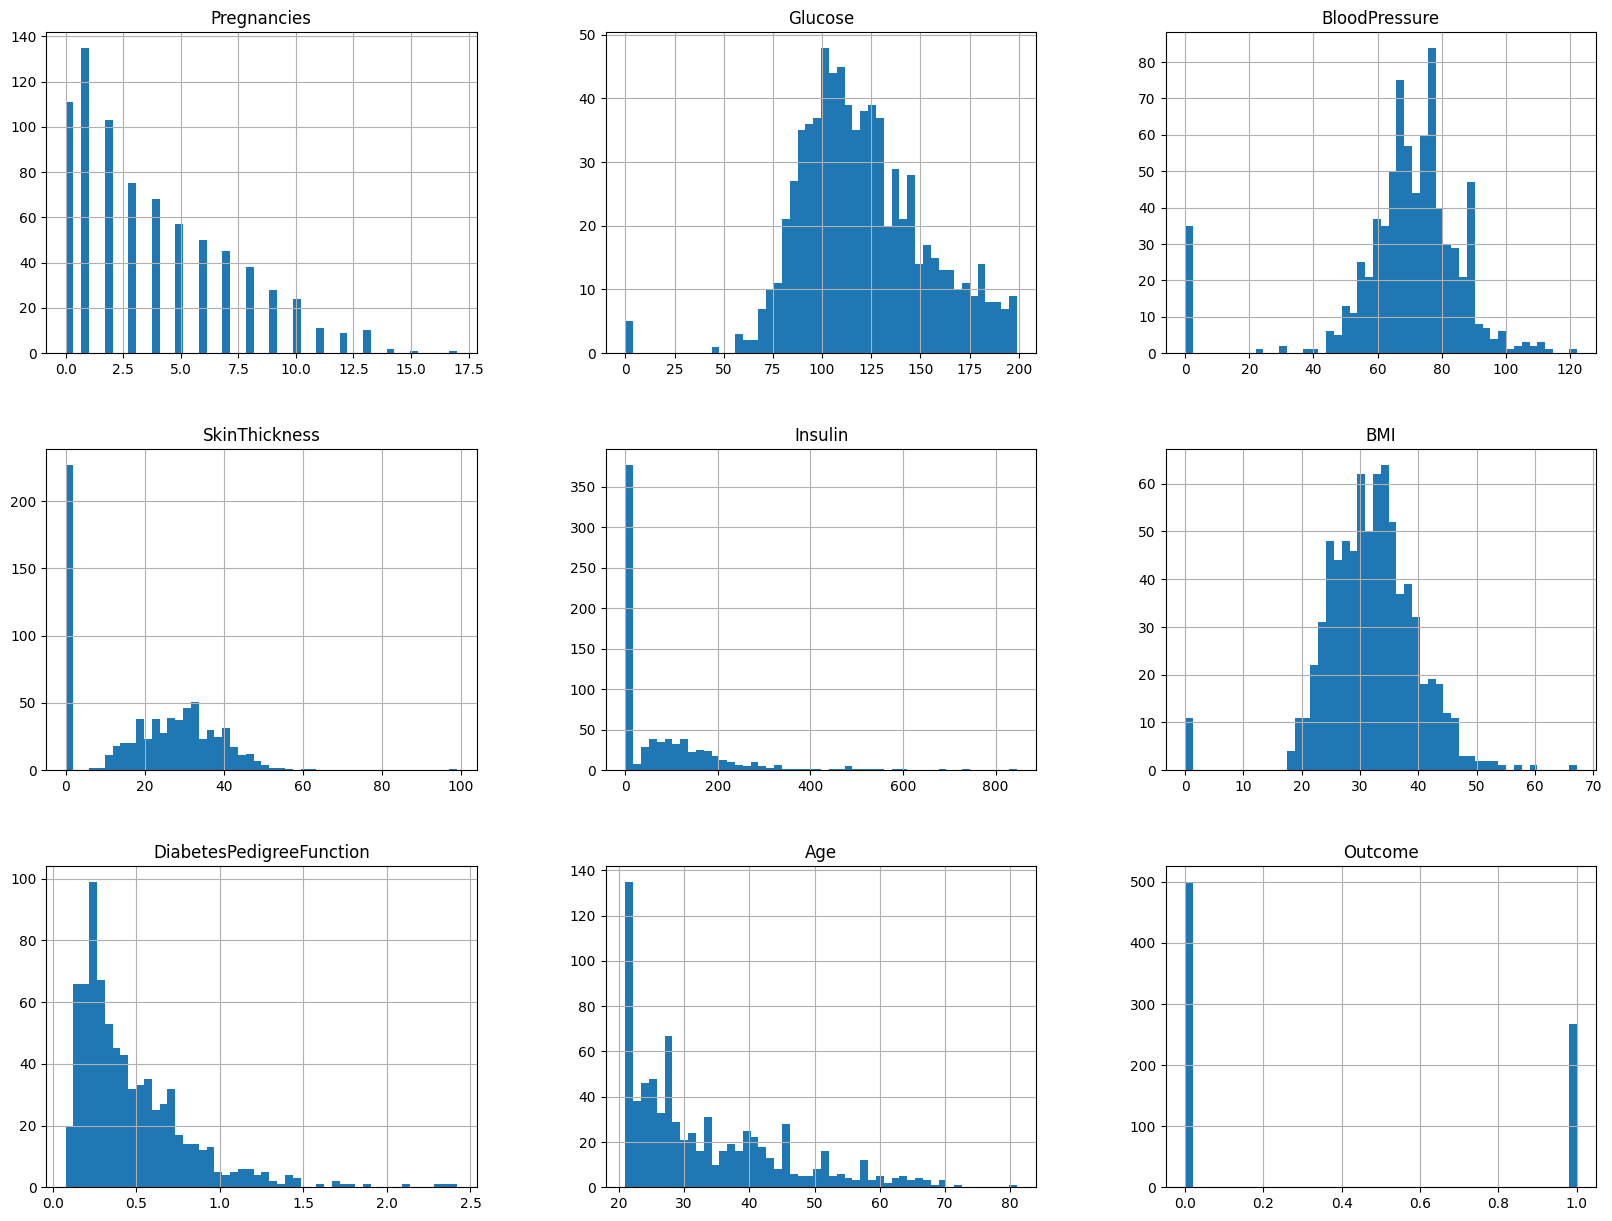

In [14]:
# Histogram
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [21]:
# Remove all the zeros with NaN as those are most probabily wrong as thsoe values can not be zero:

df = data.copy()
zero_col = ["Insulin", "SkinThickness", "Glucose", "BloodPressure", "BMI"]
df[zero_col] = df[zero_col].replace(0,np.nan)
    

In [25]:
# Replace these values with median of the column:
for col in ["Insulin", "SkinThickness", "Glucose"]:
    median_col = np.median(df[df[col].notna()][col])
    df[col] = df[col].fillna(median_col)

# Replace these values with mean of the column:
for col in ["BloodPressure", "BMI"]:
    mean_col = np.mean(df[df[col].notna()][col])
    df[col]=df[col].fillna(mean_col)

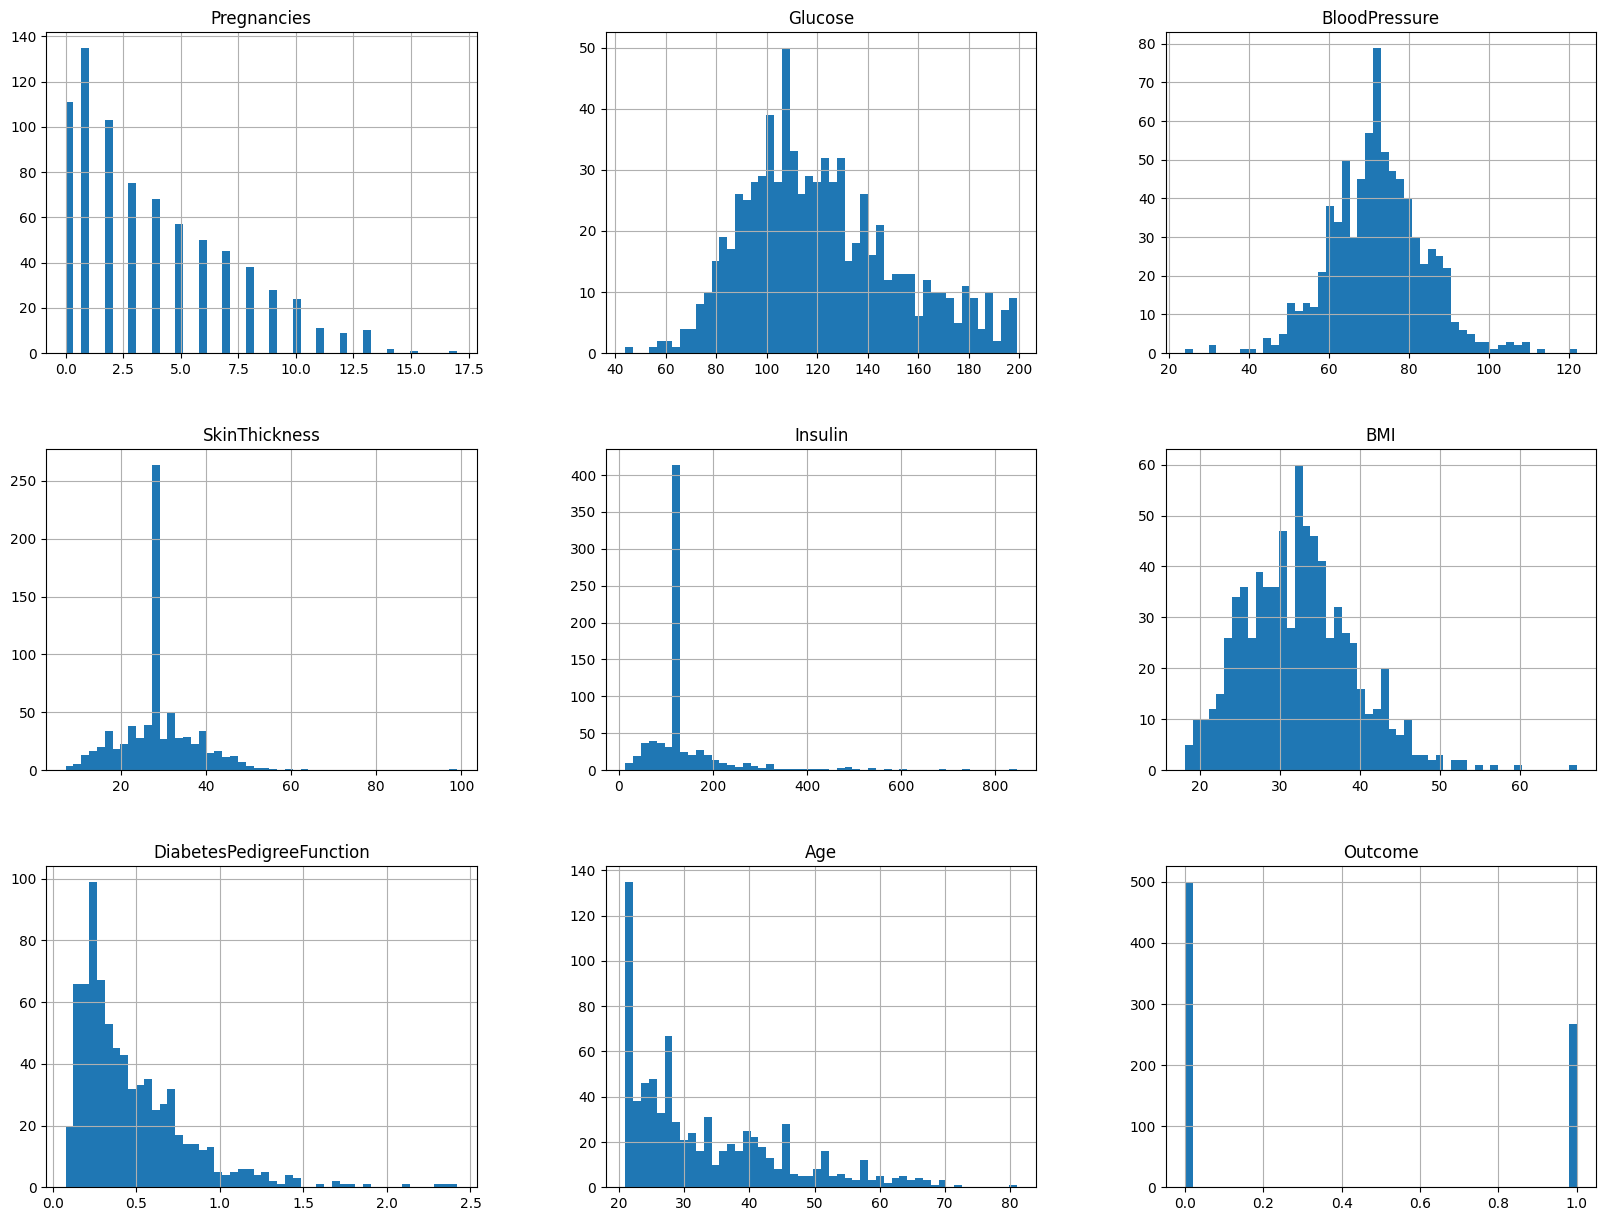

In [26]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Split the data and scale it

In [38]:
x = df.drop("Outcome", axis=1)
# print(x)

In [39]:
y = df["Outcome"]
# print(y)

In [65]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train , y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


In [67]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1, max_iter=500)

In [68]:
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,500
,multi_class,'deprecated'


In [72]:
y_pred = model.predict(x_test)
# print(len(y_pred)) == 154

In [76]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.7792207792207793


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

